# Bayesian Methods  for Inference

Suppose that $X_{1}, X_{2}, X_{3} \overset{iid}{\sim} Poisson(\lambda)$ and let the Prior distribution of ${\lambda}$ to be Chi-square(df = 5)<br>

In this notebook, I present the following
- Postrior distribution $\lambda | (x_{1}, x_{2}, x_{3})$
  and Baye's estimator of $\lambda$ given that loss function is $L(\lambda, d) = (d - \lambda)^{2}$
- 95% Credibal Interval for $\lambda$
- $H_{0}: \lambda \le 4 Vs H_{a}: \lambda > 4$ what would we choose?

I use (4, 8, 5) as my selected sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(0)

## Posterior distribution

First, I generated values of $\lambda$ and used it to form random sample $x_{1}, x_{2} x_{3}$

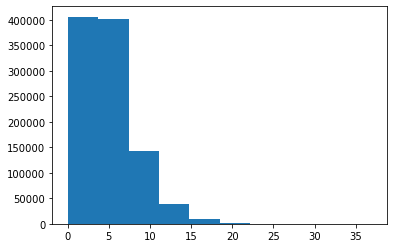

In [3]:
# find posterior of lamb|(x1, x2, x3)=(4, 8, 5) 
# and Bayes's estimator of lamb

lamb = np.random.chisquare(df=5, size=1000000)
x1 = np.random.poisson(lam=lamb)
x2 = np.random.poisson(lam=lamb)
x3 = np.random.poisson(lam=lamb)

plt.hist(lamb)
plt.show()

And here, I extracted the values of $\lambda$ only that $x_{1} = 4, x_{2} = 8, x_{3} = 5$ and assigned it to "lam_given_x" object.<br>
I then created histogram of <b>posterior distribution</b> and computed baye's estimate using .mean().<br>
And because baye's estimator is a <b>function of mean of prior distribution and MLE</b>, I showed that my baye's estimate is in between those values

shape of lambda|x1,x2,x3: (744, 4)


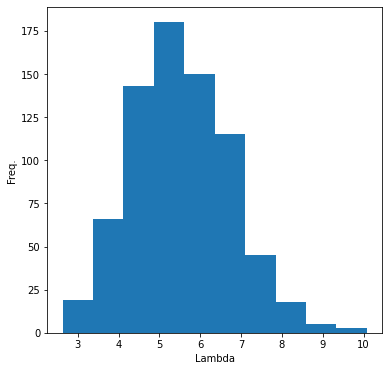

Bayesian esimate (given the loss function) is: 5.5119654999779994
Mean of prior distribution (chi-sq distribution): 5
MLE for lambda: 5.666666666666667


In [4]:
post = {
    'lambda':lamb,
    'x1':x1,
    'x2':x2,
    'x3':x3
}

post_df = pd.DataFrame(post)
lam_given_x = post_df[(post_df['x1'] == 4) & (post_df['x2'] == 8) & (post_df['x3'] == 5)]
print('shape of lambda|x1,x2,x3:', lam_given_x.shape)
print('========================================')

fig= plt.figure(figsize=(6,6))
plt.hist(lam_given_x['lambda'])
plt.xlabel('Lambda')
plt.ylabel('Freq.')
plt.show()

print('========================================')
print('Bayesian esimate (given the loss function) is:', lam_given_x['lambda'].mean())
print('Mean of prior distribution (chi-sq distribution):', 5)
print('MLE for lambda:', (4+8+5)/3 )

To determine the exact posterior distribution, I just did it mathematically and obtained that
<br>
$$\lambda | x_{1}, x_{2}, x_{3} ~ Gamma(\alpha = 19.5, \beta=2/7)$$

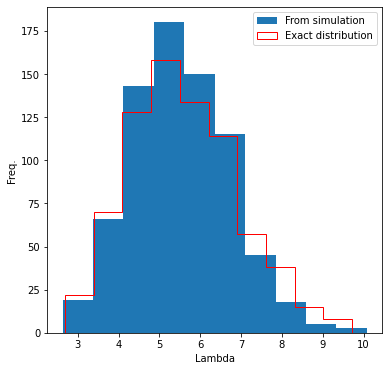

In [5]:
gamma = np.random.gamma(shape=19.5, scale=2/7, size=744)

fig= plt.figure(figsize=(6,6))
plt.hist(lam_given_x['lambda'], label='From simulation')
plt.hist(gamma, histtype='step', color='r', label='Exact distribution')
plt.xlabel('Lambda')
plt.ylabel('Freq.')
plt.legend()
plt.show()

After I obtained the posterior distribution, now I can find credible interval for lambda and conducting hypotheses testing

 value of 2.5th quantile and 97.5th quantile: [3.38627466 8.02049775]


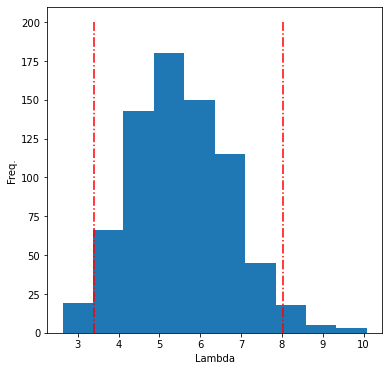

In [6]:
# Obtain 95% credible interval for lambda

post = lam_given_x['lambda'].values
quantile = np.quantile(post, [0.025, 0.975])
print(' value of 2.5th quantile and 97.5th quantile:', quantile)
print('==================================')

fig= plt.figure(figsize=(6,6))
plt.hist(post)
plt.xlabel('Lambda')
plt.ylabel('Freq.')
plt.vlines(x=quantile, ymin=0, ymax=200, colors='r', linestyle='-.')
plt.show()

In [7]:
# H0 : lambda <= 4
# Ha : lambda > 4
# choose ?

print('lambda <= 4:', np.mean(post <= 4))
print('lambda > 4:', np.mean(post >4))
print('from above, we reject H0 in favor of Ha')

lambda <= 4: 0.10349462365591398
lambda > 4: 0.896505376344086
from above, we reject H0 in favor of Ha
